In [2]:
from GA_Clustering import GACluster
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
features = df.columns[:4].tolist()
x=df[features]

In [5]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
scaler = MinMaxScaler().fit(df[features])
x = pd.DataFrame(scaler.transform(df[features]))
x.columns = features

In [7]:
num_features = x.shape[1]

In [8]:
pca = PCA()
pca.fit(x)
x_pca = pd.DataFrame(pca.transform(x))

In [9]:
pca_columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]
x_pca.columns=pca_columns

In [10]:
print('components_ ')
for i, component in zip(range(1, pca.n_components_+1), pca.components_):
    pca_desc="pca%d"%i + "="
    for j, value in zip(range(0, num_features), component):
        pca_desc+="%.2f*%s"%(value, features[j])
    print(pca_desc)

print()

components_ 
pca1=0.42*Sepal_Length-0.15*Sepal_Width0.62*Petal_Length0.65*Petal_Width
pca2=0.42*Sepal_Length0.90*Sepal_Width-0.06*Petal_Length-0.01*Petal_Width
pca3=-0.71*Sepal_Length0.34*Sepal_Width-0.07*Petal_Length0.61*Petal_Width
pca4=-0.36*Sepal_Length0.22*Sepal_Width0.78*Petal_Length-0.46*Petal_Width



In [11]:
print('explained_variance_ratio_  ')
for i, evr in zip(range(1, num_features+1), pca.explained_variance_ratio_):
    print("pca%d: %.10f"%(i,evr))
print()

explained_variance_ratio_  
pca1: 0.8413603821
pca2: 0.1175180819
pca3: 0.0347356141
pca4: 0.0063859219



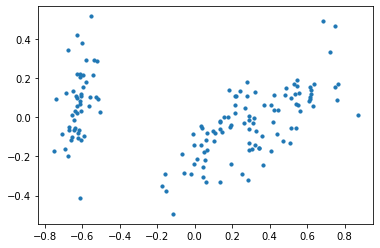

In [12]:
plt.scatter(x_pca['pca1'], x_pca['pca2'], s=10, marker='o')

<h2> Parametri za testiranje </h2>

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_SSE | K_means silhouette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    4    | roulette |  /     |   0.05        |      2       |    14         |   0.63 | 6.98 | 0.797 |
| 4      |    4    | roulette |  /     |   0.1        |      2       |    7         |   0.5 | 6.98 | 0.797 |
| 4      |    4    | tournament |  2     |   0.05        |      2       |    6.98         |   0.504 | 6.98 | 0.797 |
| 10      |    10    | tournament |    2   |   0.1        |      2       |    12.12         |   0.63 | 6.98 | 0.797 |


<h3> 1) </h3>

In [13]:
model = GACluster(n_clusters=2, max_iter=10, population_size=4, mutation_rate=0.05, elitism_size=2)

<Figure size 720x180 with 0 Axes>

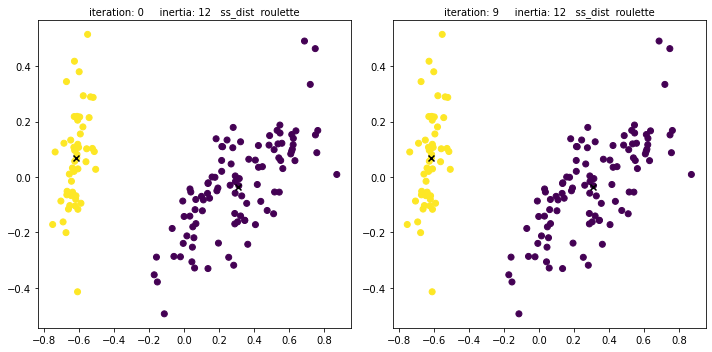

In [14]:
model.fit(x_pca)

In [15]:
model.inertia_

12.127790750538193

In [16]:
silhouette_score(x_pca, labels=model.labels_)

0.630047128435471

<h3> 2) </h3>

In [17]:
model = GACluster(n_clusters=3, max_iter=4, population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

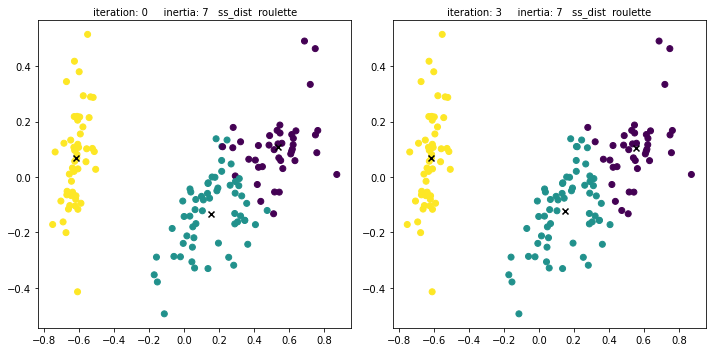

In [18]:
model.fit(x_pca)

In [19]:
silhouette_score(x_pca, labels=model.labels_)

0.5047687565398588

<h3> 3) </h3>

In [181]:
model = GACluster(n_clusters=3, max_iter=6, category='tournament', population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

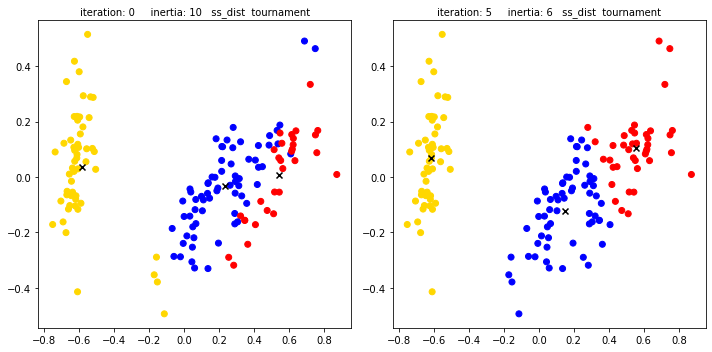

In [182]:
model.fit(x_pca)

In [183]:
model.inertia_

6.982216473785234

In [184]:
silhouette_score(x_pca, labels=model.labels_)

0.5047687565398588

<h3> 4) </h3>

In [185]:
model = GACluster(n_clusters=2, max_iter=4, category='tournament', population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

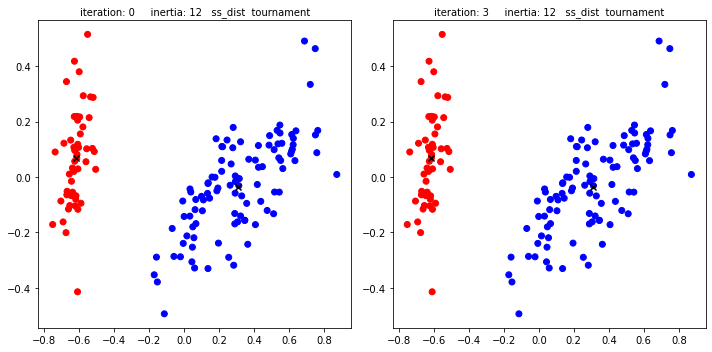

In [186]:
model.fit(x_pca)

In [187]:
model.inertia_

12.127790750538193

In [188]:
silhouette_score(x_pca, labels=model.labels_)

0.630047128435471

## KMeans

In [20]:
clusters = 3
model = KMeans(n_clusters=clusters)

In [21]:
model.fit(x_pca)

KMeans(n_clusters=3)

In [22]:
x_pca['labels'] = model.labels_
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [23]:
cluster= x_pca.loc[lambda x: x['labels'] == j, :]

In [25]:
colors = ['red', 'green', 'blue']

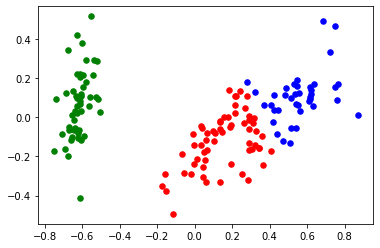

In [26]:
for j in range(0, clusters):
    cluster= x_pca.loc[lambda x: x['labels'] == j, :]
    plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=30, marker='o', label="klaster %d"%j)

In [198]:
model.inertia_

6.982216473785234

In [199]:
silhouette_score(x_pca, model.labels_)

0.7976752476198908